Tuliskan nama dan NPM Anda.

Nama: Wilson

NPM : 6182001039

# Menggambar Kurva

Pada modul ini, kita akan mencoba mencari akar dari persamaan non-linear dengan 1 variabel. Mengapa tidak membahas linear dan 1 variabel? Karena jika linear dan 1 variabel, akar bisa didapatkan dengan mudah.

Secara analitik, akar dapat diperoleh dengan memfaktorkan. Tetapi, bagaimana jika akar tidak bisa diperoleh secara analitik? Misalnya $x^2-2=0$. Kita tidak dapat menentukan secara tepat berapakah $\sqrt(2)$. Oleh karena itu, kita akan mencoba beberapa metode untuk pencarian akar secara numerik. Sebelum membahas metode untuk mencari akar, mari mencoba untuk menggambar grafik terlebih dulu. Menggambar grafik penting dalam pencarian akar, agar kita mengetahui nilai awal yang mungkin bagus untuk digunakan.

Untuk menggambar grafik di python, salah satu yang bisa digunakan adalah library matplotlib.pyplot. Perhatikan contoh berikut ini untuk menggambar grafik $f(x)=x^3-2x-2$. 

Source untuk menggunakan Pyplot:
* https://www.w3schools.com/python/matplotlib_pyplot.asp
* https://matplotlib.org/stable/tutorials/introductory/pyplot.html

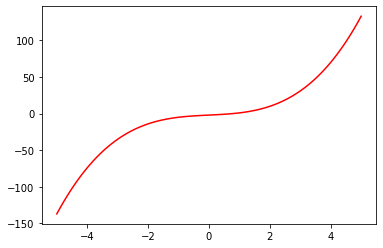

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# generate 100 nilai dari -5 hingga 5
x = np. linspace(-5,5,100)
# hitung y untuk masing-masing nilai x
y = x*x*x+2*x-2
# gunakan fungsi plot untuk menggambar fungsi y
plt.plot(x,y,'r')

Dari grafik di atas, dapat dilihat bahwa $y=x^3-2x-2$ memiliki akar di rentang $[-2,2]$ yang bisa digunakan untuk metode bisection. Cobalah untuk menambah grid dan memfokuskan gambar di rentang $[-2,2]$ agar bisa memperkirakan rentang yang lebih kecil. 

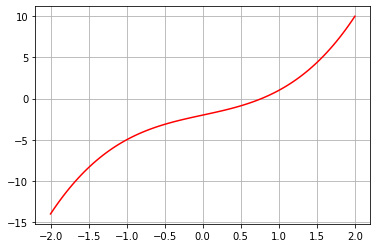

In [3]:
x = np. linspace(-2,2,100)
y = x*x*x+2*x-2
plt.plot(x,y,'r')
plt.grid(True)

Dari grafik di atas, terlihat fungsi $f(x)$ memotong sb-x saat $x$ berada di antara 0.5 dan 1.0.

# Mendefinisikan Fungsi

**TUGAS 1:** Buatlah plot dari rentang $x\in[-2,2]$ untuk fungsi $f(x)=e^{-x}-x$.

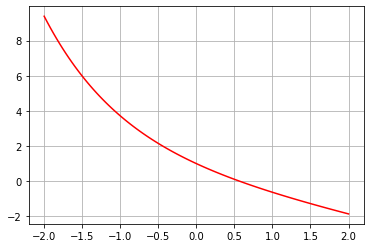

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-2,2,100)
y = math.e**-x - x
plt.plot(x,y,'r')
plt.grid(True)
plt.show()


Fungsi adalah sekumpulan baris perintah yang dijalankan saat dipanggil. Kita dapat memberikan parameter sebagai masukan fungsi dan fungsi dapat mengembalikan nilai.

Di Python, fungsi didefinisikan dengan perintah `def`.
Source untuk belajar fungsi: https://www.w3schools.com/python/python_functions.asp
        
Perhatikan contoh berikut. Berikut ini adalah contoh fungsi untuk menghitung nilai $f(x)=x^3-2x-2$.

In [5]:
def f(x):
    return x*x*x-2*x-2

Cobalah untuk menguji fungsi f(x) yang sudah dibuat dengan memanggil fungsi tersebut untuk $x=0$.

In [6]:
def fungsi(x):
    return ((x*x*x)-(2*x)-2)
print(fungsi(0))

-2


**TUGAS 2:** Buatlah fungsi dengan nama f1 untuk menghitung $f(x)=e^{-x}-x$

In [14]:
def f1(x):
   return (math.e**-x - x)

**TUGAS 3:** Cobalah lakukan tes dengan memanggil f1 untuk $x=2$

In [8]:
def f1(x):
   return (math.e**-x - x)
print (f1(2))

-1.8646647167633872


# Metode Bisection

Salah satu metode untuk mencari akar adalah dengan metode bisection. Metode bisection dapat digunakan jika kita mengetahui batas bawah dan batas atas untuk kemungkinan akar yang ingin dicari.
Seperti pada contoh sebelumnya, fungsi $y=x^3-2x-2$ memiliki akar di antara 0.5 dan 1.0. Untuk mendapatkan akar, kita mencari nilai tengah dari 0.5 dan 1.0. Setelah mendapat nilai tengahnya, kita akan memperkecil selang dengan menentukan batas baru untuk akar yang dicari.

Misal:
* $x_l$ adalah batas bawah
* $x_m$ adalah nilai tengah (didapatkan dari $x_m=\frac{x_l+x_u}{2}$)
* $x_u$ adalah batas atas

Untuk menentukan batas yang baru:
* Jika $x_l*x_m<0$, maka akar berada di rentang $[x_l,x_m]$, jadi $x_u=x_m$
* Sebaliknya, maka akar berada di rentang $[x_m,x_u]$, jadi $x_l=x_m$

Setelah mendapatkan rentang baru, cari nilai tengah  yang baru. Lakukan berulang hingga nilai $f(x_m)=0$. Kemungkinan  Anda mendapatkan $f(x_m)=0$ sangatlah kecil. Oleh karena itu, kita membutuhkan syarat berhenti yang lain. Walau $f(x_m)$ tidak persis 0, tetapi kita dapat berhenti saat error yang dimiliki sudah di bawah batas toleransi yang diperbolehkan. Error dapat dihitung dengan cara:
$$\epsilon_a = \left|\frac{x_{new}-x_{old}}{x_{new}}\right|$$

**TUGAS 4:** Lengkapilah fungsi Bisection di bawah ini sehingga mengembalikan akar dari fungsi f yang menjadi parameter fungsi tersebut. 

In [8]:
def bisection(f,xl, xu, eps=0.5e-1):
    eps = 1e-5
    xm = (xu+xl)/2
    condition = True
    while condition:
        if f(xl) * f(xm) < 0:
            xu = xm
        else:
            xl = xm
        xmt = (xu+xl)/2
        xm = xmt
        condition = abs((xmt-xm)/xmt) >= eps
    return xm

Uji fungsi yang Anda buat dengan mencari akar untuk fungsi $𝑓(𝑥)=𝑥^3−2𝑥−2$ dengan xl=0.5 dan xu=1.0. Jalankan potongan kode berikut!

In [10]:
f = lambda x: x*x*x-2*x-2
x = bisection(f,0.5,1.0)
print(x)

0.875


**TUGAS 5** Uji fungsi bisection untuk mencari akar dari fungsi $f(x)=e^{-x}-x$. Dari grafik yang Anda pernah buat sebelumnya, tentukan batas bawah dan batas atas yang sesuai. Anda juga bisa memanfaatkan fungsi f1 yang pernah Anda buat sebelumnya.

In [15]:
f = lambda x:(math.e**-x) - x
x = bisection(f, 0, 1, 0.05)
print(x)

0.75


# Fixed-Point Iteration

Fixed-point iteration adalah metode pencarian akar tanpa membutuhkan rentang lokasi dari akar. Kita dapat memulai dengan sebuah nilai awal.

Untuk menggunakan metode fixed-point, kita perlu mengubah persamaan $f(x)=0$ menjadi $x=g(x)$. Perubahan ini  dapat dilakukan dengan sedikit manipulasi aljabar atau menambahkan $x$ pada kedua ruas $f(x)=0$.

Sebagai contoh: $e^{-x}-x=0$ menjadi $x=e^{-x}$.
    
Nilai dari $g(x_i)$ akan menjadi nilai $x_{i+1}$. Setelah mendapat nilai $x$ yang baru, lakukan lagi iterasi hingga nilai error berada di bawah toleransi error. Nilai error dapat dihitung dengan cara yang sama seperti sebelumnya, yaitu:
$$\epsilon_a = \left|\frac{x_{new}-x_{old}}{x_{new}}\right|$$   

Terkadang metode fixed-point tidak berhasil konvergen (error tidak pernah lebih kecil dari batas toleransi, malah semakin membesar). Untuk mengatasi kemungkinan ini, maka kita perlu membatasi iterasi yang dilakukan.

**TUGAS 5:** Lengkapilah fungsi FixedPoint di bawah ini sehingga mengembalikan akar dari fungsi f yang menjadi parameter fungsi tersebut. 

In [30]:
def g(x):
    return 1 / math.sqrt(1+x)
def FixedPoint(f, x, eps=0.5e-1, maxiter=1000):
    c = 1
    n = 1
    condition = True
    while condition:
        x1 = g(x)
        x = x1
        n += 1
        if n > maxiter:
            c = 0
            break
        condition = abs(f(x1)) > eps
    if c == 1:
        return x1
    else:
        return "Akar tidak ditemukan"

**TUGAS 6:** Ujilah fungsi FixedPoint yang sudah Anda buat untuk kasus $f(x)=e^{-x}-x$ dengan nilai awal $x=0$. Untuk menguji fungsi tersebut tentu Anda perlu mendefinisikan fungsi baru untuk $g(x)$. Setelah memanggil fungsi FixedPoint, tentukan terlebih dahulu fungsi Anda berhasil mendapatkan akar persamaan atau tidak. Jika mendapatkan akar persamaan yang dicari, print akar persamaan. Jika tidak berhasil mendapatkan akar persamaan yang dicari, print "akar tidak ditemukan".

In [31]:
f = lambda x: (math.e**-x) - x
x = FixedPoint(f, 0)
print(x)

Akar tidak ditemukan


# Metode Newton-Raphson

Metode Newton-Raphson adalah metode pencarian akar yang memanfaatkan informasi dari gradien. Kita dapat memulai dengan sebuah nilai awal kemudian lakukan iterasi untuk mendapatkan calon akar yang baru. Calon akar yang baru didapatkan dengan mencari titik perpotongan garis gradien dengan sumbu-x.

Pada metode Newton-Raphdon, nilai $x_i$ diperoleh dari:

$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}$$

Setelah mendapat nilai $x$ yang baru, lakukan lagi iterasi hingga nilai error berada di bawah toleransi error. Nilai error dapat dihitung dengan cara yang sama seperti sebelumnya, yaitu:
$$\epsilon_a = \left|\frac{x_{new}-x_{old}}{x_{new}}\right|$$   

Terkadang metode Newton-Raphson tidak berhasil konvergen (error tidak pernah lebih kecil dari batas toleransi, malah semakin membesar). Untuk mengatasi kemungkinan ini, maka kita perlu membatasi iterasi yang dilakukan. Selain masalah kekonvergenan, metode Newton-Raphson juga akan mengalami masalah jika nilai dari $f'(x_i)=0$. Fungsi yang Anda buat harus menangani hal-hal tersebut.

**TUGAS 7:** Tuliskan fungsi yang melakukan iterasi Newton untuk fungsi $f(x)$ yang memiliki turunan $f'(x)$. Fungsi yang Anda buat bertujuan untuk menemukan akar dari $f(x)$ dengan keakuratan $\epsilon$

In [7]:
def NR(f, fder, x, eps = 0.5e-1, maxiter=1000):
    condition = True
    n = 1

    while condition:
        if fder(x)==0:
            break
        
        x1 = x - (f(x)/fder(x))
        n += 1

        if n > maxiter:
            break

        condition = abs(((x1-x)/x1)*100) > eps
        x = x1
        
    if fder(x)!=0 and abs(((x1-x)/x1)*100) <= eps:
      return x1
    else:
      return "Akar tidak ditemukan"


**TUGAS 8:** Ujilah kode Anda untuk fungsi $f(x)=x^2-6$. Tentukan nilai awal yang akan Anda gunakan.Setelah memanggil fungsi NR, tentukan terlebih dahulu fungsi Anda berhasil mendapatkan akar persamaan atau tidak. Jika mendapatkan akar persamaan yang dicari, print akar persamaan. Jika tidak berhasil mendapatkan akar persamaan yang dicari, print "akar tidak ditemukan"

In [1]:
def f(x):
    return (x**2)-6

def fder(x):
    return x*2

x = NR(f, fder, 1)
print(x)
    

NameError: name 'NR' is not defined

# Metode Secant

Ide dari metode secant sama dengan metode Newton-Raphson. Metode secant juga memanfaatkan informasi dari gradient, namun turunan yang digunakan untuk metode secant didapat dari penghampiran seperti berikut ini:
$$f'(x_i)=\frac{f(x_{i-1})-f(x_i)}{x_{i-1}-x_i}$$

Dengan mensubstitusi turunan tersebut ke persamaan yang digunakan pada metode Newton-Raphson untuk mendapatkan nilai $x$ yang baru, maka nilai $x$ yang baru bisa didapatkan dengan cara:
$$x_{i+1}=x_i-\frac{f(x_i)(x_{i-1}-x_i)}{f(x_{i-1})-f(x_i)}$$

Dari rumus yang digunakan untuk mendapatkan nilai $x$ yang baru pada metode secant, dapat dilihat bahwa diperlukan 2 nilai awal untuk metode ini (namun bukan sebagai bracket).

**TUGAS 9:** Tuliskan fungsi yang melakukan iterasi Secant untuk fungsi $f(x)$. Fungsi yang Anda buat bertujuan untuk menemukan akar dari $f(x)$ dengan keakuratan $\epsilon$

In [4]:
def Secant(f, x0, x1, eps = 0.5e-1, maxiter=1000):
    condition = True
    n = 1
    while condition:
        if f(x0) == f(x1):
            print("Akar tidak ditemukan")
            break
        
        x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) ) 
        x0 = x1
        x1 = x2
        n += 1
        
        if n > maxiter:
            print("Akar tidak ditemukan")
            break
        
        condition = abs(f(x2)) > eps
        if f(x0)!=f(x1) and n<=maxiter and abs(f(x2)) <= eps:
            return x2

**TUGAS 10:** Ujilah kode Anda untuk fungsi $f(x)=x^2-6$. Tentukan nilai awal yang akan Anda gunakan.Setelah memanggil fungsi Secant, tentukan terlebih dahulu fungsi Anda berhasil mendapatkan akar persamaan atau tidak. Jika mendapatkan akar persamaan yang dicari, print akar persamaan. Jika tidak berhasil mendapatkan akar persamaan yang dicari, print "akar tidak ditemukan"

In [5]:
f = lambda x: (x*x)-6
x = Secant(f, 0, 1)
print(x)

2.444732383135652
